## Statistics Practical Implementation
### Measure Of Central Tendency

1. Mean
2. Median
3. Mode

In [12]:
ages=[23,24,32,45,12,43,67,45,32,56,32,120]

In [13]:
import numpy as np
print(np.mean(ages))
print(np.median(ages))

44.25
37.5


In [14]:
import statistics
print(statistics.mean(ages))
print(statistics.median(ages))

44.25
37.5


In [15]:
import statistics
statistics.mode(ages)

32

<Axes: >

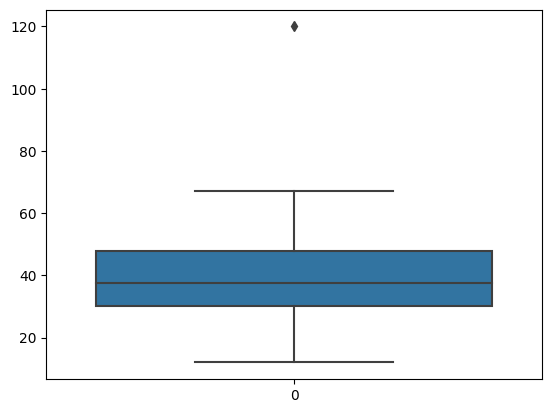

In [16]:
import seaborn as sns
sns.boxplot(ages)

## 5 Number Summary

In [17]:
import numpy as np
q1,q3=np.percentile(ages,[25,75])

In [18]:
print(q1,q3)

30.0 47.75


In [19]:
## to check outlier[Lower Fence- Higher fence]
IQR=q3-q1
lower_fence=q1-1.5*(IQR)
higher_fence=q3+1.5*(IQR)
print(lower_fence,higher_fence)

3.375 74.375


## Measure Of Dispersion

1. Variance
2. Standard Deviation

In [20]:
statistics.variance(ages)

795.2954545454545

In [21]:
np.var(ages,axis=0)

729.0208333333334

In [22]:
def variance(data):
  n=len(ages)
  ## mean of the data
  mean=sum(data)/n
  ## variance
  deviation=[(x - mean) ** 2 for x in data]
  variance=sum(deviation)/(n-1)
  return variance



In [23]:
variance(ages)

795.2954545454545

In [24]:
def variance(data,dof=0):
  n=len(ages)
  ## mean of the data
  mean=sum(data)/n
  ## variance
  deviation=[(x - mean) ** 2 for x in data]
  variance=sum(deviation)/(n-dof)
  return variance


In [25]:
variance(ages,dof=1)

795.2954545454545

In [26]:
statistics.pvariance(ages)

729.0208333333334

In [27]:
import math
math.sqrt(statistics.pvariance(ages))

27.000385799712813

## Histograms And PDF

<Axes: ylabel='Count'>

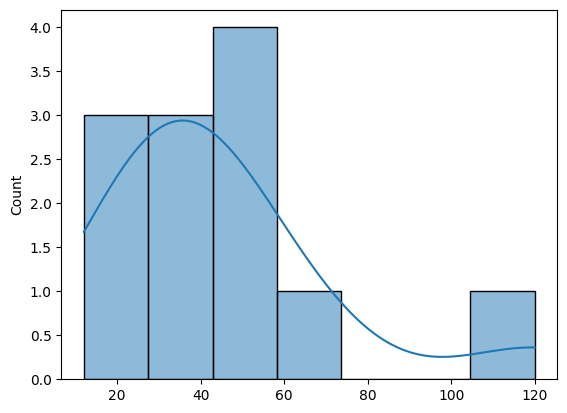

In [28]:
import seaborn as sns
sns.histplot(ages,kde=True)

In [29]:
df=sns.load_dataset('iris')

In [30]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Count'>

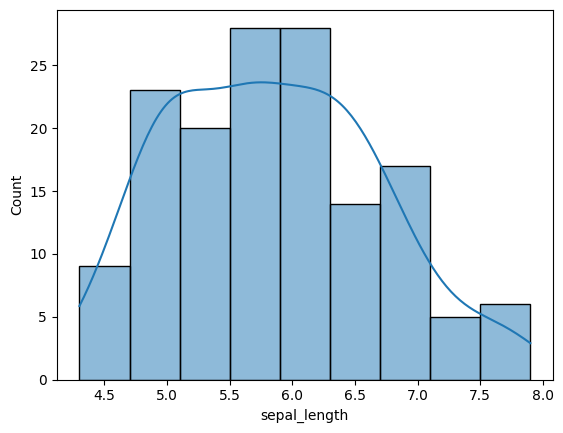

In [31]:
sns.histplot(df['sepal_length'],kde=True)

<Axes: xlabel='sepal_width', ylabel='Count'>

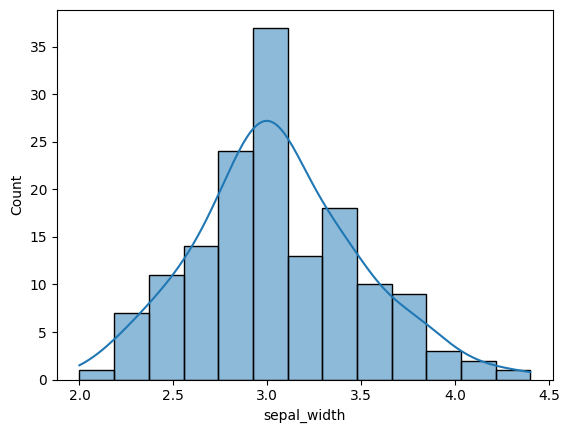

In [32]:
sns.histplot(df['sepal_width'],kde=True)

<Axes: xlabel='petal_length', ylabel='Count'>

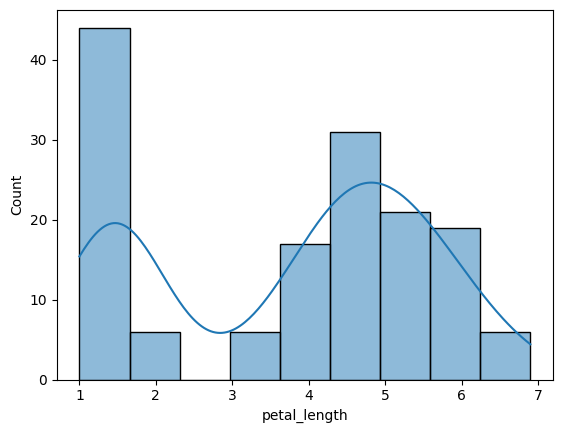

In [33]:
sns.histplot(df['petal_length'],kde=True)

<Axes: xlabel='petal_width', ylabel='Count'>

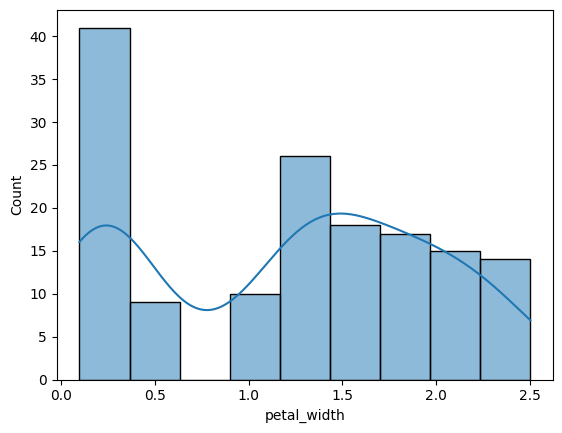

In [34]:
sns.histplot(df['petal_width'],kde=True)

In [35]:
## create a normal distributed data
s=np.random.normal(0.5,0.2,1000)

In [36]:
s

array([ 0.3717131 ,  0.28452416,  0.91186754,  0.83954183,  0.47665121,
        0.77284363,  0.45963689,  0.26093122,  0.35698054,  0.04597893,
        0.51431417,  0.3629417 ,  0.57860103,  0.37904708,  0.52925294,
        0.55223298,  0.06440388,  0.35766738,  0.41361619,  0.580308  ,
        0.6745381 ,  0.39544392,  0.52794477,  0.36353535,  0.37757398,
        0.06670992,  0.51305051,  0.45908941,  0.44880754,  0.68966484,
        0.52278459, -0.05792424,  0.40952233,  0.77114551,  0.52357321,
        0.34181484,  0.39428634,  0.40278074,  0.39877869,  0.60862351,
        0.32166062,  0.63427363,  0.50929895,  0.76028905,  0.02409507,
        0.15829609,  1.04716487,  0.71762598,  0.49686987,  0.50838974,
        0.46320108,  0.47272328,  0.66837911,  0.48931998,  0.66000163,
        0.66423837, -0.0357823 ,  0.18096632,  0.51454307,  0.69350464,
        0.47693139,  0.2386708 ,  0.13942869,  0.55971324,  0.86644576,
        0.51332442,  0.48761611,  0.50721157,  0.24046784,  0.73

<Axes: ylabel='Count'>

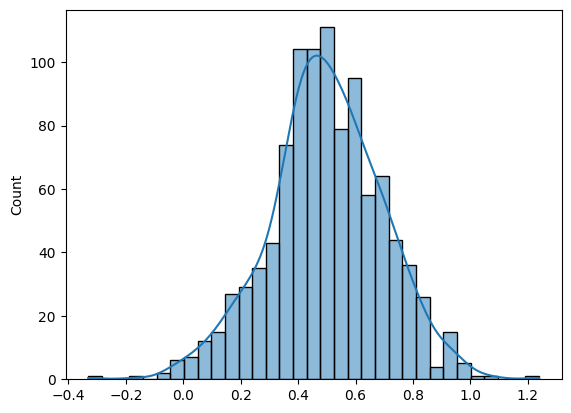

In [37]:
sns.histplot(s,kde=True)

## Other Distribuiton
## Log Normal Distribution,Power Law Distribution

In [38]:
mu, sigma = 3., 1. # mean and standard deviation
s = np.random.lognormal(mu, sigma, 1000)

<Axes: ylabel='Count'>

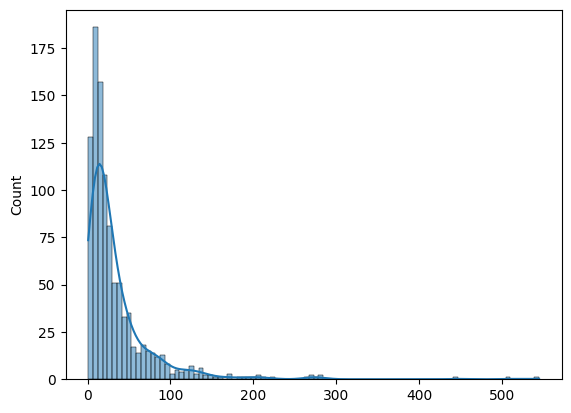

In [39]:
sns.histplot(s,kde=True)

<Axes: ylabel='Count'>

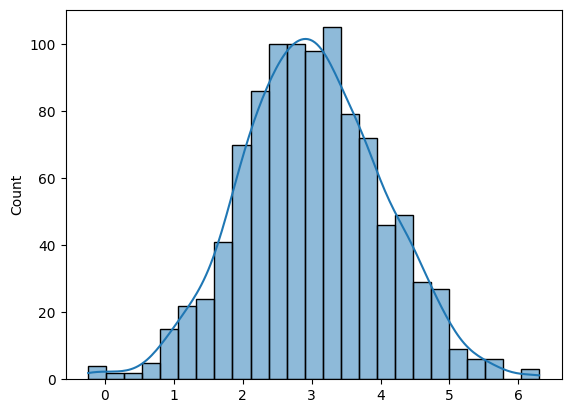

In [40]:
sns.histplot(np.log(s),kde=True)

## Check whether Disstribution is Normal Distribution

In [41]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab
def plot_data(sample):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample)
    plt.subplot(1,2,2)
    stat.probplot(sample,dist='norm',plot=pylab)
    plt.show()


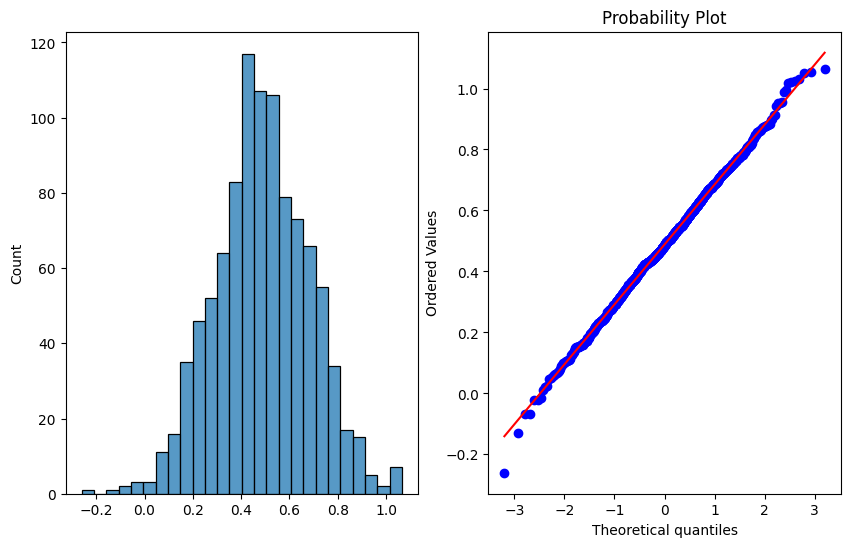

In [42]:
## create a normal distributed data
s=np.random.normal(0.5,0.2,1000)
plot_data(s)

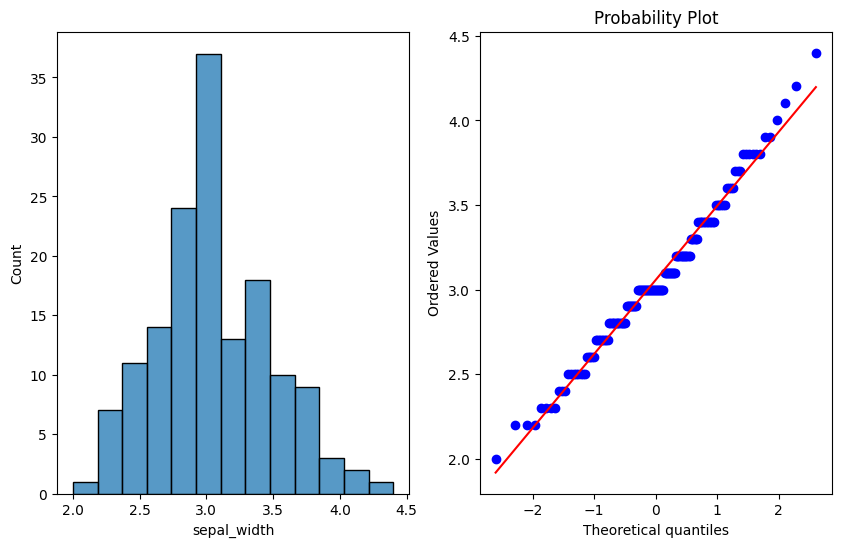

In [43]:
plot_data(df['sepal_width'])

In [44]:
mu, sigma = 3., 1. # mean and standard deviation
sample = np.random.lognormal(mu, sigma, 100)

In [45]:
def plot_data_log(sample):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample)
    plt.subplot(1,2,2)
    stat.probplot(np.log(sample),dist='norm',plot=pylab)
    plt.show()

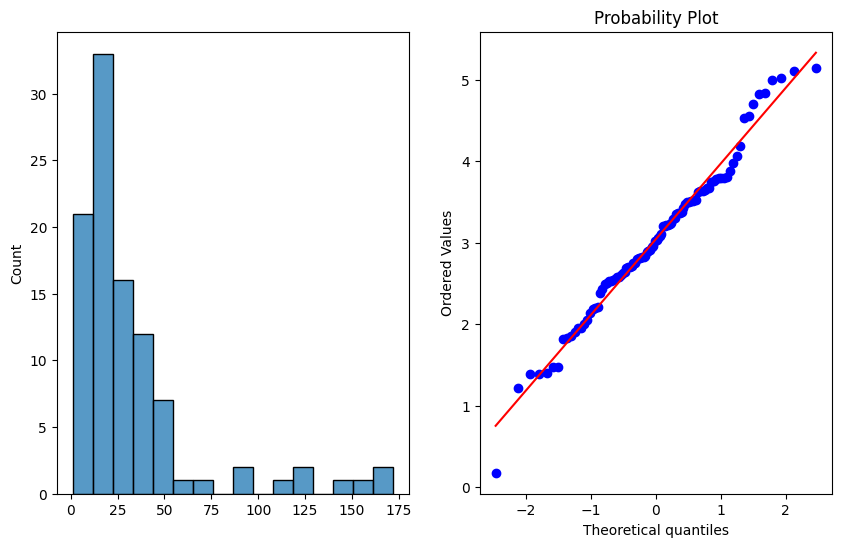

In [46]:
plot_data_log(sample)

##Pearson and Sperman Rank Correlation

In [47]:
df=sns.load_dataset('tips')

In [48]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [49]:
import pandas as pd

In [50]:
df.corr()

<ipython-input-50-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


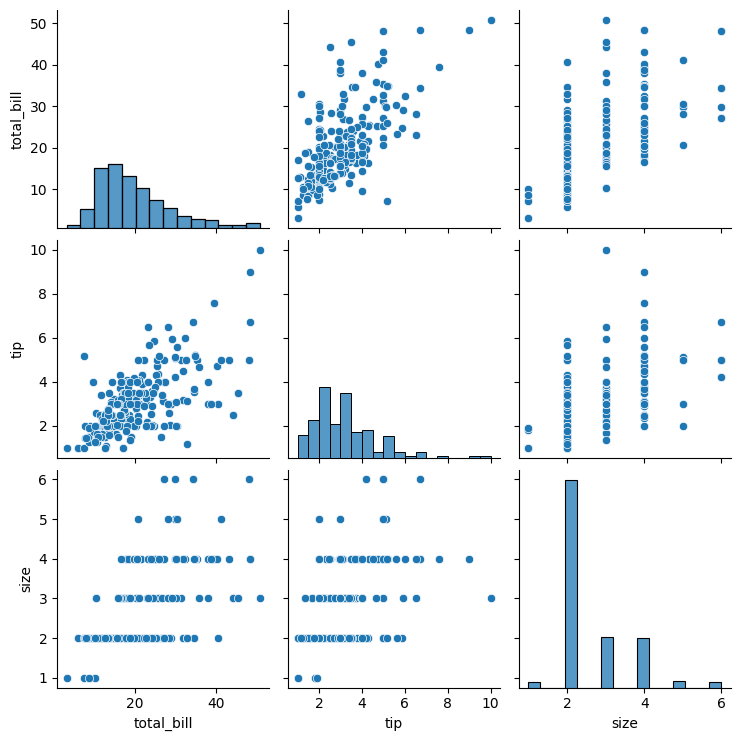

In [51]:
sns.pairplot(df)